In [1]:

pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.4 MB/s eta 0:00:00


In [2]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

vec1 = np.array([0,1,1,1])
vec2 = np.array([1,0,1,1])
vec3 = np.array([2,0,2,2])

print('벡터1과 벡터2의 유사도 :',cos_sim(vec1, vec2))
print('벡터1과 벡터3의 유사도 :',cos_sim(vec1, vec3))
print('벡터2와 벡터3의 유사도 :',cos_sim(vec2, vec3))

벡터1과 벡터2의 유사도 : 0.6666666666666667
벡터1과 벡터3의 유사도 : 0.6666666666666667
벡터2와 벡터3의 유사도 : 1.0000000000000002


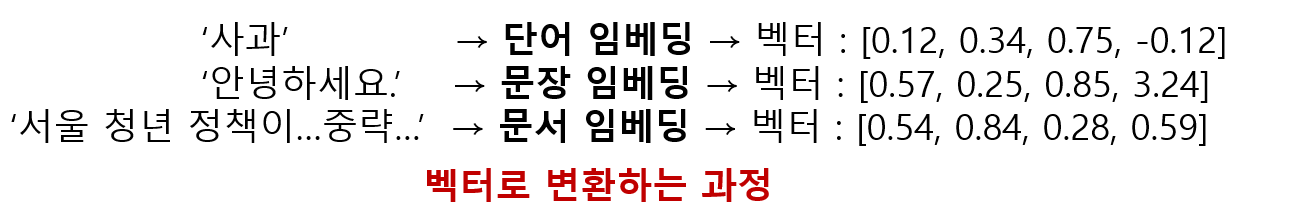

In [ ]:

import os
import numpy as np
from numpy import dot
from numpy.linalg import norm
import pandas as pd
from langchain.embeddings import OpenAIEmbeddings

# OpenAI API 키 설정 (본인의 API 키로 변경)
from dotenv import load_dotenv

# load_dotenv()
# OpenAI API 클라이언트 생성
# API_KEY = os.getenv("OPENAI_API_KEY")

from google.colab import userdata
api_key=userdata.get('api_key')
os.environ["OPENAI_API_KEY"] = api_key

In [4]:
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")
query_result = embeddings.embed_query('저는 배가 고파요')
print(query_result)


/tmp/ipython-input-683790558.py:1: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")


[-0.016637360179694076, -0.02178889820399648, 0.015218060008672603, -0.027229550411783043, -0.036822973580909475, 0.011774940995488559, -0.034562605331125026, -0.006715396218388504, -0.023996698883951017, -0.016821344811453684, -0.008134697320732525, 0.010822169159143382, -0.010559335966606544, -0.022669389166164254, 0.011308411729489716, -0.004934699127060376, 0.012070628453507821, -0.0029240226430165585, 0.008134697320732525, -0.016137977579535355, 0.0013757691074475552, -0.014547834669211755, 0.01825378780625518, -0.01270142904691878, 0.00325256459934888, 0.006432850187165448, 0.005342090808323111, -0.019016004530273287, -0.009186031022202425, -0.0017347011662188633, 0.03451003776129511, -0.01644023644944463, 0.00011386029314690754, 0.003149073942476011, 0.007372479665391873, -0.005480078816481543, -0.006354000229404396, 0.0034726878055520963, -0.0037848023963125694, -0.0022505118304413413, -0.022432838827219824, -0.010362211305034551, 0.011354407887429618, -0.024732633685699258, 0.

In [5]:
data = ['저는 배가 고파요',
        '저기 배가 지나가네요',
        '굶어서 허기가 지네요',
        '허기 워기라는 게임이 있는데 즐거워',
        '스팀에서 재밌는 거 해야지',
        '스팀에어프라이어로 연어구이 해먹을거야']

df = pd.DataFrame(data, columns=['text'])
df


,text
0,저는 배가 고파요
1,저기 배가 지나가네요
2,굶어서 허기가 지네요
3,허기 워기라는 게임이 있는데 즐거워
4,스팀에서 재밌는 거 해야지
5,스팀에어프라이어로 연어구이 해먹을거야


In [6]:
def get_embedding(text):
  return embeddings.embed_query(text)

df['embedding'] = df.apply(lambda row: get_embedding(
        row.text,
    ), axis=1)
df

,text,embedding
0,저는 배가 고파요,"[-0.016637360179694076, -0.02178889820399648, ..."
1,저기 배가 지나가네요,"[-0.0032914344795325024, -0.027514765824463994..."
2,굶어서 허기가 지네요,"[-0.006181030746934311, -0.006950793503402665,..."
3,허기 워기라는 게임이 있는데 즐거워,"[-0.011329255872108568, -0.011715852525143846,..."
4,스팀에서 재밌는 거 해야지,"[-0.01610845668785982, -0.014401600417918041, ..."
5,스팀에어프라이어로 연어구이 해먹을거야,"[-0.0021389091187001565, -0.030034279922246478..."


In [7]:
def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

def return_answer_candidate(df, query):
    query_embedding = get_embedding(
        query
    )
    df["similarity"] = df.embedding.apply(lambda x: cos_sim(np.array(x),
                                                            np.array(query_embedding)))
    top_three_doc = df.sort_values("similarity",
                                ascending=False).head(3)
    return top_three_doc

In [8]:
sim_result = return_answer_candidate(df, '아무것도 안 먹었더니 꼬르륵 소리가 나네')
sim_result

,text,embedding,similarity
2,굶어서 허기가 지네요,"[-0.006181030746934311, -0.006950793503402665,...",0.836768
5,스팀에어프라이어로 연어구이 해먹을거야,"[-0.0021389091187001565, -0.030034279922246478...",0.815944
0,저는 배가 고파요,"[-0.016637360179694076, -0.02178889820399648, ...",0.812184
